NumPy 迭代器对象 numpy.nditer 提供了一种灵活访问一个或者多个数组元素的方式。

迭代器最基本的任务的可以完成对数组元素的访问。

接下来我们使用 arange() 函数创建一个 2X3 数组，并使用 nditer 对它进行迭代。

In [1]:
import numpy as np

a=np.arange(6).reshape(2,3)
print ('原始数组是：')
print (a)

print ('\n')
print ('迭代输出元素：')
for x in np.nditer(a):
    print(x,end=",")

原始数组是：
[[0 1 2]
 [3 4 5]]


迭代输出元素：
0,1,2,3,4,5,

以上实例不是使用标准 C 或者 Fortran 顺序，选择的顺序是和数组内存布局一致的，这样做是为了提升访问的效率，默认是行序优先（row-major order，或者说是 C-order）。

这反映了默认情况下只需访问每个元素，而无需考虑其特定顺序。我们可以通过迭代上述数组的转置来看到这一点，并与以 C 顺序访问数组转置的 copy 方式做对比，如下实例：

In [3]:
a=np.arange(6).reshape(2,3)
for x in np.nditer(a.T):
    print(x,end=",")
print("\n")

for x in np.nditer(a.T.copy(order="C")):
    print(x,end=",")


0,1,2,3,4,5,

0,3,1,4,2,5,

从上述例子可以看出，a 和 a.T 的遍历顺序是一样的，也就是他们在内存中的存储顺序也是一样的，a.T只是a的视图而已。但是 a.T.copy(order = 'C') 的遍历结果是不同的，那是因为它和前两种的存储方式是不一样的，默认是按行访问。

控制遍历顺序

for x in np.nditer(a, order='F'):Fortran order，即是列序优先；
for x in np.nditer(a.T, order='C'):C order，即是行序优先；

虽然按照F和C风格排序的数组c在打印输出时的结果是一样的，但是它们在存储方式和访问方式上有所不同。

按C风格copy的数组c是按照行优先的方式排列元素的，即在内存中先存储第一行的元素，接着是第二行的元素，以此类推。因此，当我们通过索引访问这个数组时，一行中的元素是连续存储的，这种存储方式对于按行遍历数组的算法效率更高。

按F风格copy的数组c则是按列优先的方式排列元素的，即在内存中先存储第一列的元素，接着是第二列的元素，以此类推。因此，当我们通过索引访问这个数组时，一列中的元素是连续存储的，这种存储方式对于按列遍历数组的算法效率更高。

In [7]:
a=np.arange(0,60,5)
a=a.reshape(3,4)
print ('原始数组是：') 
print (a) 

print ('\n') 
print ('原始数组的转置是：') 
b=a.T
print(b)

print ('\n') 
print ('以 C 风格顺序copy：') 
c=b.copy(order="C") # 将转置数组b复制为按C风格排序的新数组c
print(c)
for x in np.nditer(c):
    print(x,end=",")
    
print ('\n') 
for x in np.nditer(b,order="C"):
    print(x,end=",")
    
    
print("\n")
print('以 F 风格顺序copy：')  # 将转置数组b复制为按F风格排序的新数组c
c=b.copy(order="F")
print(c)
for x in np.nditer(c):
    print(x,end=",")

print ('\n') 
for x in np.nditer(b,order="F"):
    print(x,end=",")

原始数组是：
[[ 0  5 10 15]
 [20 25 30 35]
 [40 45 50 55]]


原始数组的转置是：
[[ 0 20 40]
 [ 5 25 45]
 [10 30 50]
 [15 35 55]]


以 C 风格顺序排序：
[[ 0 20 40]
 [ 5 25 45]
 [10 30 50]
 [15 35 55]]
0,20,40,5,25,45,10,30,50,15,35,55,

0,20,40,5,25,45,10,30,50,15,35,55,

以 F 风格顺序排序：
[[ 0 20 40]
 [ 5 25 45]
 [10 30 50]
 [15 35 55]]
0,5,10,15,20,25,30,35,40,45,50,55,

0,5,10,15,20,25,30,35,40,45,50,55,

可以通过显式设置，来强制 nditer 对象使用某种顺序：

In [8]:
a = np.arange(0,60,5) 
a = a.reshape(3,4)  
print ('原始数组是：')
print (a)

print ('\n')
print ('以 C 风格顺序排序：')
for x in np.nditer(a, order =  'C'):  
    print (x, end=", " )
    

print ('\n')
print ('以 F 风格顺序排序：')
for x in np.nditer(a, order =  'F'):  
    print (x, end=", " )

原始数组是：
[[ 0  5 10 15]
 [20 25 30 35]
 [40 45 50 55]]


以 C 风格顺序排序：
0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 

以 F 风格顺序排序：
0, 20, 40, 5, 25, 45, 10, 30, 50, 15, 35, 55, 

修改数组中元素的值

nditer 对象有另一个可选参数 op_flags。 默认情况下，nditer 将视待迭代遍历的数组为只读对象（read-only），为了在遍历数组的同时，实现对数组元素值得修改，必须指定 readwrite 或者 writeonly 的模式。

In [10]:
a=np.arange(0,60,5)
a=a.reshape(3,4)
print ('原始数组是：')
print (a)

print ('\n')
for x in np.nditer(a,op_flags=["readwrite"]):
    x[...]=2*x
print ('修改后的数组是：')
print (a)

原始数组是：
[[ 0  5 10 15]
 [20 25 30 35]
 [40 45 50 55]]


修改后的数组是：
[[  0  10  20  30]
 [ 40  50  60  70]
 [ 80  90 100 110]]


使用外部循环

nditer 类的构造器拥有 flags 参数，它可以接受下列值：
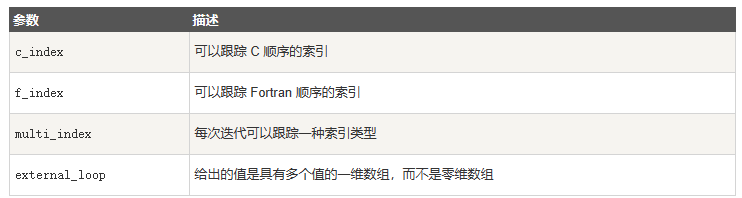
在下面的实例中，迭代器遍历对应于每列，并组合为一维数组。

In [12]:
a=np.arange(0,60,5)
a=a.reshape(3,4)
print ('原始数组是：')
print (a)

print ('\n')
print ('修改后的数组是：')
for x in np.nditer(a,flags=["external_loop"],order="F"):
    print(x,end=",")

原始数组是：
[[ 0  5 10 15]
 [20 25 30 35]
 [40 45 50 55]]


修改后的数组是：
[ 0 20 40],[ 5 25 45],[10 30 50],[15 35 55],

广播迭代
如果两个数组是可广播的，nditer 组合对象能够同时迭代它们。 假设数组 a 的维度为 3X4，数组 b 的维度为 1X4 ，则使用以下迭代器（数组 b 被广播到 a 的大小）。

In [14]:
a = np.arange(0,60,5) 
a = a.reshape(3,4)  
print  ('第一个数组为：')
print (a)

print  ('\n')
print ('第二个数组为：')
b=np.array([1,2,3,4],dtype="i1")
print (b)

print ('\n')
print ('修改后的数组为：')
for x,y in np.nditer([a,b]):
    print(f"{x}:{y}",end=",")

第一个数组为：
[[ 0  5 10 15]
 [20 25 30 35]
 [40 45 50 55]]


第二个数组为：
[1 2 3 4]


修改后的数组为：
0:1,5:2,10:3,15:4,20:1,25:2,30:3,35:4,40:1,45:2,50:3,55:4,

这一章节，有点绕。

总结一下 :

In [15]:
for x in np.nditer(a, op_flags=['readwrite']): 
    x[...]=2*x 

x[...] 是修改原 numpy 元素，x 只是个拷贝。

order = 'C'，numpy 实例（也就是一个多维数组）本身的存储顺序不会因为转置或 order = 'C' 或 'F' 而改变。

只是 numpy 实例中，存储了一个默认的访问顺序的字段。

numpy.copy 做了特殊处理，它拷贝的时候不是直接把对方的内存复制，而是按照上面 order 指定的顺序逐一拷贝。

for x in np.nditer(a, order = 'C'): 可以在循环中另外指定顺序，如果未指定，则按照上面数组的order顺序访问。

In [17]:
for x in np.nditer(a, flags = ['external_loop'], order = 'F'): 
    print (x, end=", " )

[ 0 40 80], [10 50 90], [ 20  60 100], [ 30  70 110], 

flags = ['external_loop']，当数组的 order 与在循环中指定的 order 顺序不同时，打印为多个一维数组，当相同时，是整个一个一维数组。

nditer 中 order 默认是 K 顺序，它表示尽可能接近数组元素在内存中的显示数据，并不是默认 C 顺序。